# Thu thập dữ liệu

In [ ]:
import os, re, requests, unicodedata, time
from tqdm import tqdm

BASE_DIR = "/content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia"
os.makedirs(BASE_DIR, exist_ok=True)

TOPICS = [
    "Việt Nam", "Hà Nội", "Thành phố Hồ Chí Minh", "Lịch sử Việt Nam",
    "Văn hóa Việt Nam", "Giáo dục", "Kinh tế Việt Nam", "Khoa học",
    "Công nghệ", "Trí tuệ nhân tạo", "Internet", "Toán học",
    "Vật lý", "Sinh học", "Y học", "Văn học", "Âm nhạc",
    "Bóng đá", "Du lịch Việt Nam", "Môi trường","Hồ Chí Minh",
    "Chính trị Việt Nam", "Pháp luật Việt Nam", "Tôn giáo Việt Nam", "Triết học",
    "Ngôn ngữ học", "Hóa học", "Khoa học máy tính", "Điện tử viễn thông",
    "Nghệ thuật và Điện ảnh", "Xã hội và Đời sống"
]


ARTICLES_PER_TOPIC = 100
SESSION = requests.Session()
SESSION.headers.update({"User-Agent": "VN-WikiCollector/1.0 (student@example.com)"})

In [ ]:
def slugify(s: str) -> str:
    s = s.lower().strip()
    s = unicodedata.normalize("NFKD", s)
    s = re.sub(r"[^\w\s-]", "", s)
    s = re.sub(r"\s+", "-", s)
    return s[:60]


def wiki_search_titles(topic: str, limit: int = 50):
    """Tìm các tiêu đề bài liên quan đến topic."""
    url = "https://vi.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "list": "search",
        "srsearch": topic,
        "srlimit": limit,
    }
    try:
        r = SESSION.get(url, params=params, timeout=15)
        r.raise_for_status()
        data = r.json()
        return [e["title"] for e in data.get("query", {}).get("search", [])]
    except Exception:
        return []


def wiki_fetch_article(title: str):
    """Lấy nội dung chi tiết 1 bài."""
    url = "https://vi.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "prop": "extracts",
        "explaintext": 1,
        "titles": title
    }
    try:
        r = SESSION.get(url, params=params, timeout=20)
        r.raise_for_status()
        pages = r.json().get("query", {}).get("pages", {})
        for _, page in pages.items():
            if "extract" in page and len(page["extract"].split()) > 80:
                return page["extract"].strip()
        return ""
    except Exception:
        return ""

In [ ]:
# THU THẬP VÀ LƯU THEO THƯ MỤC
GLOBAL_SEEN_TITLES = set()

for topic in TOPICS:
    print(f"\n🔹 Đang thu thập chủ đề: {topic}")
    topic_slug = slugify(topic)
    topic_dir = os.path.join(BASE_DIR, topic_slug)
    os.makedirs(topic_dir, exist_ok=True)

    titles = wiki_search_titles(topic, limit=ARTICLES_PER_TOPIC)
    print(f"  → Tìm thấy {len(titles)} tiêu đề liên quan.")
    saved = 0
    for t in tqdm(titles, desc=f"Lưu bài {topic}"):
        if t in GLOBAL_SEEN_TITLES:  # bỏ qua bài đã từng lưu
            continue
        text = wiki_fetch_article(t)
        if not text:
            continue
        fn = os.path.join(topic_dir, f"{slugify(t)}.txt")
        with open(fn, "w", encoding="utf-8") as f:
            f.write(text)
        saved += 1
        GLOBAL_SEEN_TITLES.add(t)
        time.sleep(0.2)

    print(f"{topic} → Lưu {saved} bài tại: {topic_dir}")

print("\nHoàn tất toàn bộ quá trình thu thập Wikipedia!")


🔹 Đang thu thập chủ đề: Việt Nam
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Việt Nam: 100%|██████████| 100/100 [00:40<00:00,  2.47it/s]


Việt Nam → Lưu 100 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/viet-nam

🔹 Đang thu thập chủ đề: Hà Nội
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Hà Nội: 100%|██████████| 100/100 [00:30<00:00,  3.31it/s]


Hà Nội → Lưu 84 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/ha-noi

🔹 Đang thu thập chủ đề: Thành phố Hồ Chí Minh
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Thành phố Hồ Chí Minh: 100%|██████████| 100/100 [00:31<00:00,  3.16it/s]


Thành phố Hồ Chí Minh → Lưu 96 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/thanh-pho-ho-chi-minh

🔹 Đang thu thập chủ đề: Lịch sử Việt Nam
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Lịch sử Việt Nam: 100%|██████████| 100/100 [00:27<00:00,  3.69it/s]


Lịch sử Việt Nam → Lưu 70 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/lich-su-viet-nam

🔹 Đang thu thập chủ đề: Văn hóa Việt Nam
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Văn hóa Việt Nam: 100%|██████████| 100/100 [00:32<00:00,  3.05it/s]


Văn hóa Việt Nam → Lưu 80 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/van-hoa-viet-nam

🔹 Đang thu thập chủ đề: Giáo dục
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Giáo dục: 100%|██████████| 100/100 [00:40<00:00,  2.45it/s]


Giáo dục → Lưu 77 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/giao-duc

🔹 Đang thu thập chủ đề: Kinh tế Việt Nam
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Kinh tế Việt Nam: 100%|██████████| 100/100 [00:28<00:00,  3.50it/s]


Kinh tế Việt Nam → Lưu 71 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/kinh-te-viet-nam

🔹 Đang thu thập chủ đề: Khoa học
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Khoa học: 100%|██████████| 100/100 [00:34<00:00,  2.92it/s]


Khoa học → Lưu 89 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/khoa-hoc

🔹 Đang thu thập chủ đề: Công nghệ
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Công nghệ: 100%|██████████| 100/100 [00:27<00:00,  3.66it/s]


Công nghệ → Lưu 62 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/cong-nghe

🔹 Đang thu thập chủ đề: Trí tuệ nhân tạo
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Trí tuệ nhân tạo: 100%|██████████| 100/100 [00:31<00:00,  3.19it/s]


Trí tuệ nhân tạo → Lưu 81 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/tri-tue-nhan-tao

🔹 Đang thu thập chủ đề: Internet
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Internet: 100%|██████████| 100/100 [00:36<00:00,  2.71it/s]


Internet → Lưu 89 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/internet

🔹 Đang thu thập chủ đề: Toán học
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Toán học: 100%|██████████| 100/100 [00:39<00:00,  2.51it/s]


Toán học → Lưu 84 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/toan-hoc

🔹 Đang thu thập chủ đề: Vật lý
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Vật lý: 100%|██████████| 100/100 [00:34<00:00,  2.89it/s]


Vật lý → Lưu 76 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/vat-ly

🔹 Đang thu thập chủ đề: Sinh học
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Sinh học: 100%|██████████| 100/100 [00:29<00:00,  3.42it/s]


Sinh học → Lưu 70 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/sinh-hoc

🔹 Đang thu thập chủ đề: Y học
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Y học: 100%|██████████| 100/100 [00:27<00:00,  3.63it/s]


Y học → Lưu 76 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/y-hoc

🔹 Đang thu thập chủ đề: Văn học
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Văn học: 100%|██████████| 100/100 [00:24<00:00,  4.11it/s]


Văn học → Lưu 54 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/van-hoc

🔹 Đang thu thập chủ đề: Âm nhạc
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Âm nhạc: 100%|██████████| 100/100 [00:37<00:00,  2.65it/s]


Âm nhạc → Lưu 90 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/am-nhac

🔹 Đang thu thập chủ đề: Bóng đá
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Bóng đá: 100%|██████████| 100/100 [00:47<00:00,  2.10it/s]


Bóng đá → Lưu 93 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/bong-đa

🔹 Đang thu thập chủ đề: Du lịch Việt Nam
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Du lịch Việt Nam: 100%|██████████| 100/100 [00:29<00:00,  3.42it/s]


Du lịch Việt Nam → Lưu 73 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/du-lich-viet-nam

🔹 Đang thu thập chủ đề: Môi trường
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Môi trường: 100%|██████████| 100/100 [00:29<00:00,  3.41it/s]


Môi trường → Lưu 74 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/moi-truong

🔹 Đang thu thập chủ đề: Chính trị Việt Nam
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Chính trị Việt Nam: 100%|██████████| 100/100 [00:24<00:00,  4.09it/s]


Chính trị Việt Nam → Lưu 60 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/chinh-tri-viet-nam

🔹 Đang thu thập chủ đề: Pháp luật Việt Nam
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Pháp luật Việt Nam: 100%|██████████| 100/100 [00:29<00:00,  3.42it/s]


Pháp luật Việt Nam → Lưu 74 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/phap-luat-viet-nam

🔹 Đang thu thập chủ đề: Tôn giáo Việt Nam
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Tôn giáo Việt Nam: 100%|██████████| 100/100 [00:29<00:00,  3.42it/s]


Tôn giáo Việt Nam → Lưu 74 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/ton-giao-viet-nam

🔹 Đang thu thập chủ đề: Triết học
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Triết học: 100%|██████████| 100/100 [00:30<00:00,  3.23it/s]


Triết học → Lưu 67 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/triet-hoc

🔹 Đang thu thập chủ đề: Ngôn ngữ học
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Ngôn ngữ học: 100%|██████████| 100/100 [00:33<00:00,  3.02it/s]


Ngôn ngữ học → Lưu 89 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/ngon-ngu-hoc

🔹 Đang thu thập chủ đề: Hóa học
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Hóa học: 100%|██████████| 100/100 [00:27<00:00,  3.69it/s]


Hóa học → Lưu 68 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/hoa-hoc

🔹 Đang thu thập chủ đề: Khoa học máy tính
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Khoa học máy tính: 100%|██████████| 100/100 [00:24<00:00,  4.04it/s]


Khoa học máy tính → Lưu 68 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/khoa-hoc-may-tinh

🔹 Đang thu thập chủ đề: Điện tử viễn thông
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Điện tử viễn thông: 100%|██████████| 100/100 [00:26<00:00,  3.83it/s]


Điện tử viễn thông → Lưu 67 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/đien-tu-vien-thong

🔹 Đang thu thập chủ đề: Nghệ thuật và Điện ảnh
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Nghệ thuật và Điện ảnh: 100%|██████████| 100/100 [00:32<00:00,  3.06it/s]


Nghệ thuật và Điện ảnh → Lưu 86 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/nghe-thuat-va-đien-anh

🔹 Đang thu thập chủ đề: Xã hội và Đời sống
  → Tìm thấy 100 tiêu đề liên quan.


Lưu bài Xã hội và Đời sống: 100%|██████████| 100/100 [00:23<00:00,  4.28it/s]

Xã hội và Đời sống → Lưu 57 bài tại: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia/xa-hoi-va-đoi-song

Hoàn tất toàn bộ quá trình thu thập Wikipedia!


In [ ]:
import os

BASE_DIR = "/content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/Wikipedia"
# File đầu ra
OUTPUT_FILE = "/content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/all_text.txt"

TARGET_FOLDERS = [
    "ho-chi-minh",
    "thanh-pho-ho-chi-minh",
    "viet-nam",
    "lich-su-viet-nam",
    "chinh-tri-viet-nam",
    "xa-hoi-va-doi-song",
    "triet-hoc",
    "van-hoa-viet-nam",
    "giao-duc",
    "van-hoc"
]

def read_selected_folders(base_dir, folders, output_file):
    texts = []
    total_files = 0
    total_bytes = 0

    for folder in folders:
        folder_path = os.path.join(base_dir, folder)
        for root, _, files in os.walk(folder_path):
            for file in files:
                if file.endswith(".txt"):
                    file_path = os.path.join(root, file)
                    total_files += 1
                    total_bytes += os.path.getsize(file_path)
                    with open(file_path, "r", encoding="utf-8") as f:
                        texts.append(f.read())

    # Gộp toàn bộ nội dung
    all_text = "\n".join(texts)
    total_mb = total_bytes / (1024 * 1024)
    total_tokens = len(all_text.split())

    # Ghi file văn bản hợp nhất
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(all_text)

    print("Đã ghi dữ liệu vào:", output_file)
    print("Thống kê dữ liệu:")
    print(f"Tổng số thư mục đọc: {len(folders)}")
    print(f"Tổng số bài (file .txt): {total_files}")
    print(f"Tổng dung lượng: {total_mb:.2f} MB")
    print(f"Tổng số ký tự: {len(all_text):,}")
    print(f"Tổng số từ: {total_tokens:,}")

    return all_text

# Gọi hàm
all_text = read_selected_folders(BASE_DIR, TARGET_FOLDERS, OUTPUT_FILE)


Đã ghi dữ liệu vào: /content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/all_text.txt
Thống kê dữ liệu:
Tổng số thư mục đọc: 10
Tổng số bài (file .txt): 702
Tổng dung lượng: 21.22 MB
Tổng số ký tự: 17,008,169
Tổng số từ: 3,694,622


In [ ]:
# Đường dẫn tới file đã lưu
OUTPUT_FILE = "/content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/all_text.txt"

# Đọc lại toàn bộ nội dung
with open(OUTPUT_FILE, "r", encoding="utf-8") as f:
    all_text = f.read()

# Kiểm tra nhanh
print("Đã load dữ liệu thành công!")
print("Số ký tự:", len(all_text))
print("Số từ:", len(all_text.split()))
print("\n300 ký tự đầu tiên:\n")
print(all_text[:300], "...")

Đã load dữ liệu thành công!
Số ký tự: 17008169
Số từ: 3694622

300 ký tự đầu tiên:

Hồ Chí Minh (chữ Nho: 胡志明; 19 tháng 5 năm 1890 – 2 tháng 9 năm 1969), tên khai sinh là Nguyễn Sinh Cung (chữ Nho: 阮生恭), còn được gọi phổ biến tại Việt Nam với tên gọi Bác Hồ, là một nhà cách mạng và chính khách người Việt Nam. Ông là người sáng lập Đảng Cộng sản Việt Nam, từng là Chủ tịch nước Việt  ...


In [7]:
!pip install underthesea


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.1 MB/s eta 0:00:00


# Mô hình N-gram

Tiền xử lý và tokanize

In [ ]:
from underthesea import word_tokenize
import re, pickle, os

# TIỀN XỬ LÝ + TOKENIZE THEO CHUNK
def preprocess_and_tokenize(all_text, chunk_size=1_000_000, save_path=None):
    """
    Tiền xử lý & tokenize văn bản lớn theo từng phần nhỏ (~1MB)
    để tránh tràn RAM. Có thể lưu lại file .pkl để dùng lại sau.
    """
    # --- Tiền xử lý ---
    text = all_text.lower()
    text = re.sub(
        r"[^a-z0-9àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệ"
        r"ìíỉĩịòóỏõọôồốổỗộơờớởỡợ"
        r"ùúủũụưừứửữựỳýỷỹỵđ\s]",
        " ",
        text
    )
    text = re.sub(r"\s+", " ", text).strip()
    # --- Chia nhỏ văn bản ---
    chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    tokens = []
    for i, chunk in enumerate(chunks):
        print(f"Đang xử lý phần {i+1}/{len(chunks)}...")
        chunk_tokens = word_tokenize(chunk)
        tokens.extend(chunk_tokens)
        print(f"   → Đã có {len(tokens):,} tokens")

    print("Hoàn tất tiền xử lý & tách từ.")
    print(f"Tổng số token: {len(tokens):,}")

    # --- Nếu có đường dẫn lưu ---
    if save_path:
        with open(save_path, "wb") as f:
            pickle.dump(tokens, f)
        print(f"📦 Đã lưu token vào: {save_path}")

    return tokens


SAVE_PATH = "/content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/tokens.pkl"

if os.path.exists(SAVE_PATH):
    print(f"File đã tồn tại: {SAVE_PATH}, tải lại để tiết kiệm thời gian.")
    with open(SAVE_PATH, "rb") as f:
        tokens = pickle.load(f)
else:
    print("Đang tokenize toàn bộ văn bản...")
    tokens = preprocess_and_tokenize(all_text, chunk_size=1_000_000, save_path=SAVE_PATH)

print("\nTổng số token:", len(tokens))
print("20 token đầu:", tokens[:20])


Đang tokenize toàn bộ văn bản...
Đang xử lý phần 1/17...
   → Đã có 161,663 tokens
Đang xử lý phần 2/17...
   → Đã có 320,169 tokens
Đang xử lý phần 3/17...
   → Đã có 480,787 tokens
Đang xử lý phần 4/17...
   → Đã có 639,444 tokens
Đang xử lý phần 5/17...
   → Đã có 803,413 tokens
Đang xử lý phần 6/17...
   → Đã có 964,941 tokens
Đang xử lý phần 7/17...
   → Đã có 1,126,776 tokens
Đang xử lý phần 8/17...
   → Đã có 1,292,992 tokens
Đang xử lý phần 9/17...
   → Đã có 1,450,404 tokens
Đang xử lý phần 10/17...
   → Đã có 1,608,326 tokens
Đang xử lý phần 11/17...
   → Đã có 1,769,248 tokens
Đang xử lý phần 12/17...
   → Đã có 1,933,466 tokens
Đang xử lý phần 13/17...
   → Đã có 2,094,765 tokens
Đang xử lý phần 14/17...
   → Đã có 2,257,589 tokens
Đang xử lý phần 15/17...
   → Đã có 2,421,934 tokens
Đang xử lý phần 16/17...
   → Đã có 2,586,846 tokens
Đang xử lý phần 17/17...
   → Đã có 2,653,116 tokens
Hoàn tất tiền xử lý & tách từ.
Tổng số token: 2,653,116
📦 Đã lưu token vào: /content/dr

In [2]:
import pickle

SAVE_PATH = "/content/drive/MyDrive/Colab Notebooks/NLP/Giữa kì/dataset/tokens.pkl"

with open(SAVE_PATH, "rb") as f:
    tokens = pickle.load(f)

print("Đã load thành công!")
print("Tổng số token:", len(tokens))
print("20 token đầu:", tokens[:20])

Đã load thành công!
Tổng số token: 2653116
20 token đầu: ['hồ', 'chí minh', 'chữ nho', '19', 'tháng', '5', 'năm', '1890', '2', 'tháng', '9', 'năm', '1969', 'tên', 'khai sinh', 'là', 'nguyễn sinh cung', 'chữ nho', 'còn', 'được']


Bigram và Trigram

In [3]:
from collections import Counter

def generate_ngrams(tokens, n=3):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

bigrams  = Counter(generate_ngrams(tokens, 2))
trigrams = Counter(generate_ngrams(tokens, 3))
vocab_size = len(set(tokens))

print(f"Tổng số bigram: {len(bigrams):,}")
print(f"Tổng số trigram: {len(trigrams):,}")
print(f"Kích thước từ vựng: {vocab_size:,}")


Tổng số bigram: 897,665
Tổng số trigram: 1,821,212
Kích thước từ vựng: 102,193


Xác suất với smoothing (Laplace/Lidstone)

In [41]:
def calculate_probability(n_gram, n_gram_counts, vocab_size, alpha=1):
    n_gram_count = n_gram_counts.get(n_gram, 0)
    return (n_gram_count + alpha) / (sum(n_gram_counts.values()) + alpha * vocab_size)

Tính perplexity

In [42]:
def calculate_perplexity(sentence, n_gram_counts, vocab_size, alpha=1):
    toks = word_tokenize(preprocess_text(sentence))
    ngrams = generate_ngrams(toks, len(next(iter(n_gram_counts.keys()))))
    prob_product = 1.0
    for ngram in ngrams:
        prob_product *= calculate_probability(ngram, n_gram_counts, vocab_size, alpha)
    return prob_product ** (-1 / len(toks))

In [9]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(
        r"[^a-z0-9àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệ"
        r"ìíỉĩịòóỏõọôồốổỗộơờớởỡợ"
        r"ùúủũụưừứửữựỳýỷỹỵđ\s]",
        " ",
        text
    )
    text = re.sub(r"\s+", " ", text).strip()
    return text

Sinh câu

In [10]:
from underthesea import word_tokenize
import os, re, math
# SINH CÂU (Trigram + Bigram fallback + Smoothing)
def generate_text(context, trigrams, bigrams, vocab_size, alpha=1.0, max_words=20):
    """
    Sinh văn bản dựa trên mô hình Trigram + Bigram fallback,
    có áp dụng Laplace hoặc Lidstone smoothing.
    - alpha = 1.0  → Laplace smoothing
    - alpha = 0.1  → Lidstone smoothing
    """
    toks = word_tokenize(preprocess_text(context))

    for _ in range(max_words):
        # Ưu tiên dùng trigram
        ctx = tuple(toks[-2:])
        trigram_candidates = {tri: c for tri, c in trigrams.items() if tri[:2] == ctx}
        if trigram_candidates:
            # Tính xác suất với smoothing
            probs = {
                tri[2]: (count + alpha) /
                        (sum(trigram_candidates.values()) + alpha * vocab_size)
                for tri, count in trigram_candidates.items()
            }
        else:
            # Nếu không có trigram → fallback sang bigram
            ctx = tuple(toks[-1:])
            bigram_candidates = {bi: c for bi, c in bigrams.items() if bi[:1] == ctx}
            if not bigram_candidates:
                break  # không có gì để sinh thêm
            probs = {
                bi[1]: (count + alpha) /
                       (sum(bigram_candidates.values()) + alpha * vocab_size)
                for bi, count in bigram_candidates.items()
            }

        # Chọn từ có xác suất cao nhất
        next_word = max(probs, key=probs.get)
        toks.append(next_word)

        # Dừng nếu gặp dấu kết thúc câu
        if next_word in [".", "!", "?"]:
            break

    return " ".join(toks)

In [ ]:
context = "Chủ tịch Hồ Chí Minh là người"
gen_lidstone = generate_text(context, trigrams, bigrams, vocab_size, alpha=0.1)
print(gen_lidstone)

chủ tịch hồ chí minh là người đã soạn thảo đọc bản tuyên ngôn độc lập thành lập nước việt nam dân chủ cộng hòa và trở thành chủ tịch nước việt nam dân chủ cộng hòa và


In [ ]:
context = "Sáng lập ra"
gen_lidstone = generate_text(context, trigrams, bigrams, vocab_size, alpha=0.1)
print(gen_lidstone)

sáng lập ra hội liên hiệp thanh niên việt nam trong đó có nhiều người trong đó có nhiều người trong đó có nhiều người trong


In [ ]:
context = "Chủ tịch"
gen_lidstone = generate_text(context, trigrams, bigrams, vocab_size, alpha=0.1)
print(gen_lidstone)

chủ tịch nước việt nam dân chủ cộng hòa và cộng hòa miền nam việt nam và trung quốc về việt nam và trung quốc về việt nam và trung quốc


In [ ]:
context = "Hồ Chí Minh"
gen_lidstone = generate_text(context, trigrams, bigrams, vocab_size, alpha=0.1)
print(gen_lidstone)

hồ chí minh đã được sử dụng để chỉ các khu vực khác nhau trong đó có nhiều người trong đó có nhiều người trong


In [ ]:
context = "Đất nước Việt Nam"
gen_lidstone = generate_text(context, trigrams, bigrams, vocab_size, alpha=0.1)
print(gen_lidstone)

đất nước việt nam qua các thời kỳ lịch sử không phân tích các quan điểm của ông là người có khả năng tự mình chấp chính và sắc phong thêm


In [ ]:
context = "Việt Nam"
gen_lidstone = generate_text(context, trigrams, bigrams, vocab_size, alpha=0.1)
print(gen_lidstone)

việt nam dân chủ cộng hòa và cộng hòa miền nam việt nam và trung quốc về việt nam và trung quốc về việt nam và trung quốc về việt nam


In [ ]:
context = "Chủ tịch Hồ Chí Minh là người"
gen_lidstone = generate_text(context, trigrams, bigrams, vocab_size, alpha=0.1)
print(gen_lidstone)

chủ tịch hồ chí minh là người có khả năng tự mình chấp chính và sắc phong thêm 5 thượng thư mới xuất thân từ tầng lớp trung lưu việt nam người ta có thể thấy


Đánh giá Laplace vs Lidstone

In [43]:
test_sentence = "Chủ tịch Hồ Chí Minh là người"

laplace_ppl = calculate_perplexity(test_sentence, trigrams, vocab_size, alpha=1.0)
lidstone_ppl = calculate_perplexity(test_sentence, trigrams, vocab_size, alpha=0.1)

print(f"Perplexity (Laplace):  {laplace_ppl:.2f}")
print(f"Perplexity (Lidstone): {lidstone_ppl:.2f}")

Perplexity (Laplace):  406.77
Perplexity (Lidstone): 401.94


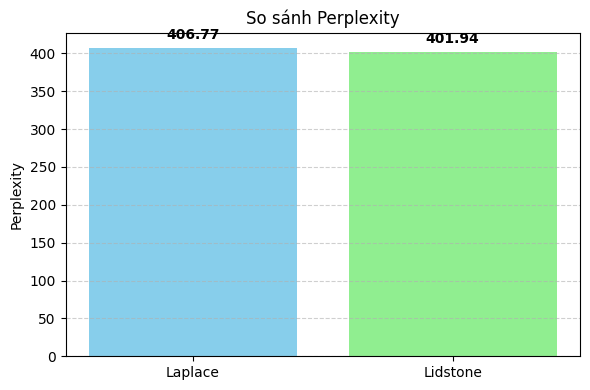

In [44]:
import matplotlib.pyplot as plt

methods = ["Laplace", "Lidstone"]
values  = [laplace_ppl, lidstone_ppl]

plt.figure(figsize=(6,4))
bars = plt.bar(methods, values, color=["skyblue", "lightgreen"])
plt.title("So sánh Perplexity")
plt.ylabel("Perplexity")
plt.grid(axis="y", linestyle="--", alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.02,
             f"{height:.2f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()